# План по уроку

## Кластеризация времменых рядов
## Зачем прогнозить диапозоны (еще раз)
## Чуть-чуть про лоссы
## Как прогнозировать диапозоны
## Какую метрику качества можно выбрать


## Кластеризация времменых рядов
### Кластеризация в ценообразовании
С помощью кластеризации можем выбрать товары интересные с точки зрения ценообразовани.

Кластеризуем по цене, обороту/прибыли, эластичности 

Выбираем группы: 
 - "Генераторы трафика" - товары с наибольшими продажами
 - "Генераторы прибыли" - товары с низкой эластичностью с невысокой ценой и средними продажами
 - "Промотовары" - товары продающиеся только в промо
 - "Усилители прибыли" - товары с низкой эластичностью и эпизодическими характерами продаж



### Кластеризация времменых рядов
#### Time series Kmeans
#### DTW
#### Embending подход

## Зачем прогнозировать диапозоны
### Выигрышь на каждом моменте
<img src="curve.png" width="800">


### Проблема цен конкурентов
1) Знаем цены из буклетов по промо

2) Знаем цены на сегодняшний день, а должны изменять цену на завтра

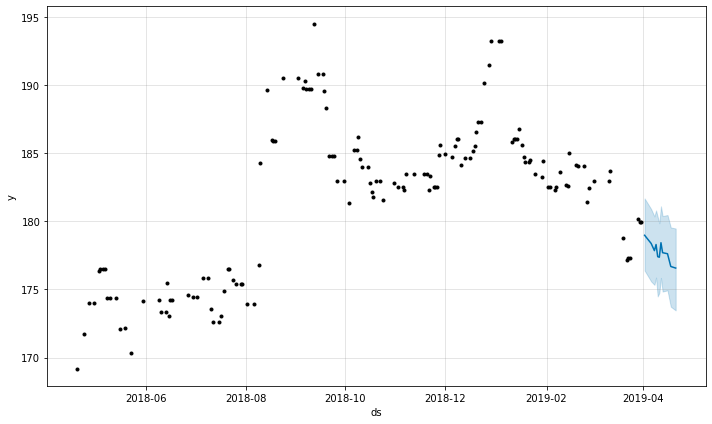

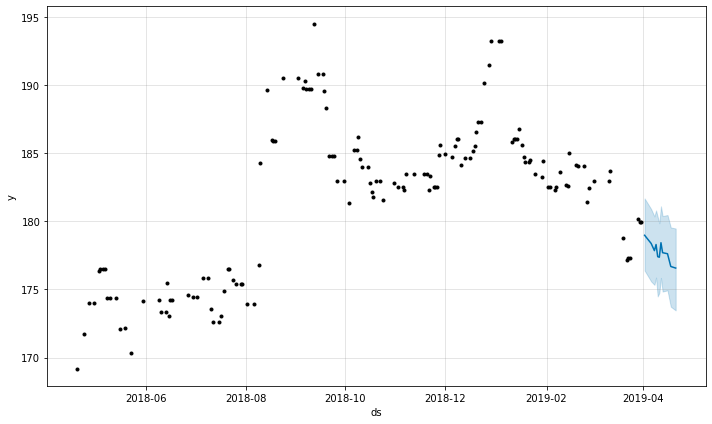

In [66]:
prophet.plot(pred_df)

## Чуть-чуть про лоссы

<img src = https://miro.medium.com/max/1131/0*ufWnnvTA9AkjKrfI>

## Как прогнозировать диапозоны

In [1]:
import pandas as pd
import numpy as np

In [2]:
from pandas.plotting import autocorrelation_plot

In [3]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [4]:
ZX_df = pd.read_csv('ZX10208_agr.csv')

In [5]:
ZX_df

,dates,SKU,price_per_sku,num_purchases
0,2018-04-20,59567,169.19,3
1,2018-04-24,59567,171.71,3
2,2018-04-27,59567,174.04,3
3,2018-04-30,59567,NaN,1
4,2018-05-03,59567,176.38,2
...,...,...,...,...
254,2019-12-23,82947,NaN,1
255,2019-12-24,82947,195.46,2
256,2019-12-25,82947,195.21,1
257,2019-12-26,82947,193.79,1


In [6]:
ZX_df['dates'] = pd.to_datetime(ZX_df.dates)

In [7]:
ZX_df['price_per_sku'] = ZX_df.groupby('SKU').price_per_sku.ffill()

In [8]:
pivot_t = ZX_df.pivot_table(index='dates',columns='SKU', values='price_per_sku')

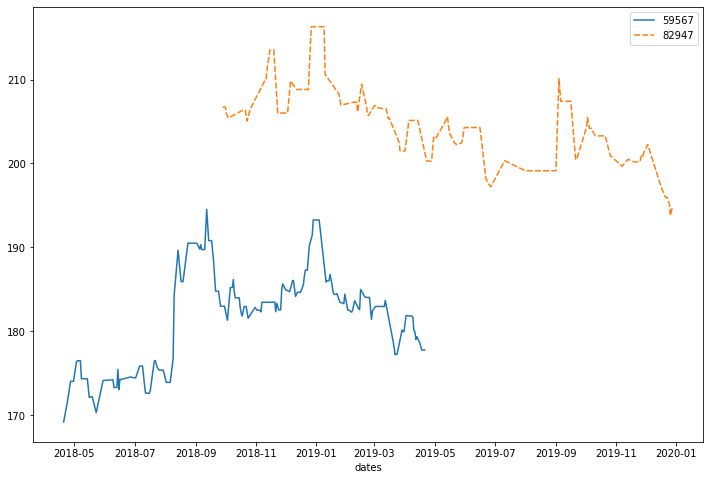

In [9]:
plt.figure(figsize=(12,8))
sns.lineplot(data =pivot_t)

In [10]:
df_59567 = ZX_df[ZX_df.SKU == 59567]

In [11]:
df_59567.dates.describe()

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                     156
unique                    156
top       2018-12-21 00:00:00
freq                        1
first     2018-04-20 00:00:00
last      2019-04-21 00:00:00
Name: dates, dtype: object

In [12]:
train_df = df_59567[df_59567.dates <= pd.to_datetime('2019-04-01')]
test_df = df_59567[df_59567.dates > pd.to_datetime('2019-04-01')]

In [13]:
train_df.shape

(145, 4)

In [14]:
test_df.shape

(11, 4)

In [15]:
train_df

,dates,SKU,price_per_sku,num_purchases
0,2018-04-20,59567,169.19,3
1,2018-04-24,59567,171.71,3
2,2018-04-27,59567,174.04,3
3,2018-04-30,59567,174.04,1
4,2018-05-03,59567,176.38,2
...,...,...,...,...
184,2019-03-23,59567,177.28,3
185,2019-03-24,59567,177.28,1
188,2019-03-29,59567,180.15,1
189,2019-03-30,59567,179.96,1


In [20]:
# Autoregressive Integrated Moving Average with boundaries
from statsmodels.tsa.arima.model import ARIMA
ARIMA_ = ARIMA(train_df.price_per_sku.values, order=(20,1,20))
ARIMA_model = ARIMA_.fit()
ARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)


/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


array([180.83419547, 180.48032031, 180.31605765, 181.11192182,
       178.6975036 , 179.13991888, 177.75230121, 177.77676229,
       179.94879324, 178.96750661, 180.37365968])

In [21]:
ARIMA_model.get_forecast(11).conf_int(0.05)

array([[178.06829191, 183.60009904],
       [176.30826813, 184.6523725 ],
       [175.09975164, 185.53236366],
       [175.31293954, 186.91090411],
       [172.32016917, 185.07483804],
       [172.21549331, 186.06434445],
       [170.32440144, 185.18020099],
       [169.88070465, 185.67281994],
       [171.56958408, 188.32800239],
       [170.10680264, 187.82821059],
       [171.10796352, 189.63935585]])

In [24]:
test_df['ARIMA_low_boundary'] = ARIMA_model.get_forecast(11).conf_int(0.05)[:,0]
test_df['ARIMA_high_boundary'] = ARIMA_model.get_forecast(11).conf_int(0.05)[:,1]
test_df['ARIMA_model_prediction'] = ARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [28]:
test_df.columns

Index(['dates', 'SKU', 'price_per_sku', 'num_purchases', 'ARIMA_low_boundary',
       'ARIMA_high_boundary', 'ARIMA_model_prediction'],
      dtype='object')

In [30]:
test_df

,dates,SKU,price_per_sku,num_purchases,ARIMA_low_boundary,ARIMA_high_boundary,ARIMA_model_prediction
192,2019-04-02,59567,181.86,2,178.068292,183.600099,180.834195
194,2019-04-06,59567,181.83,2,176.308268,184.652373,180.480320
195,2019-04-08,59567,181.83,1,175.099752,185.532364,180.316058
196,2019-04-09,59567,181.67,1,175.312940,186.910904,181.111922
197,2019-04-10,59567,180.08,2,172.320169,185.074838,178.697504
198,2019-04-11,59567,179.97,2,172.215493,186.064344,179.139919
199,2019-04-12,59567,179.03,1,170.324401,185.180201,177.752301
200,2019-04-13,59567,179.36,1,169.880705,185.672820,177.776762
202,2019-04-16,59567,178.61,2,171.569584,188.328002,179.948793
203,2019-04-18,59567,177.77,1,170.106803,187.828211,178.967507


In [67]:
col_list = ['dates','ARIMA_model_prediction', 'ARIMA_low_boundary', 'ARIMA_high_boundary', 'price_per_sku']

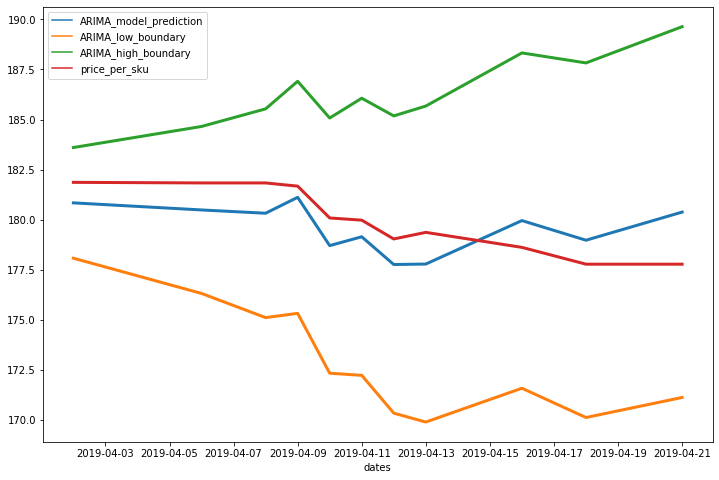

In [68]:
plt.figure(figsize=(12,8))
sns.lineplot(data=test_df[col_list].set_index('dates'), dashes=False,linewidth = 3)

In [35]:
from fbprophet import Prophet

In [36]:
prophet = Prophet()

In [37]:
prophet.fit(train_df[['dates', 'price_per_sku']].rename(columns={'dates':'ds','price_per_sku':'y'}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
pred_df = prophet.predict(test_df[['dates']].rename(columns={'dates':'ds'}))

In [39]:
pred_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-04-02,178.633746,176.392152,181.687884,178.633746,178.633746,0.348957,0.348957,0.348957,0.348957,0.348957,0.348957,0.0,0.0,0.0,178.982703
1,2019-04-06,178.245861,175.593122,180.908031,178.154876,178.351091,0.135763,0.135763,0.135763,0.135763,0.135763,0.135763,0.0,0.0,0.0,178.381623
2,2019-04-08,178.051918,175.340567,180.363832,177.871084,178.254842,-0.198890,-0.198890,-0.198890,-0.198890,-0.198890,-0.198890,0.0,0.0,0.0,177.853028
3,2019-04-09,177.954947,175.874946,180.807456,177.720665,178.218691,0.348957,0.348957,0.348957,0.348957,0.348957,0.348957,0.0,0.0,0.0,178.303904
4,2019-04-10,177.857975,174.489504,180.332070,177.578452,178.183085,-0.445631,-0.445631,-0.445631,-0.445631,-0.445631,-0.445631,0.0,0.0,0.0,177.412344
5,2019-04-11,177.761004,174.744684,179.863937,177.419113,178.145971,-0.393023,-0.393023,-0.393023,-0.393023,-0.393023,-0.393023,0.0,0.0,0.0,177.367981
6,2019-04-12,177.664033,175.850826,181.109850,177.269965,178.118474,0.771600,0.771600,0.771600,0.771600,0.771600,0.771600,0.0,0.0,0.0,178.435632
7,2019-04-13,177.567061,174.848311,180.392544,177.105855,178.079916,0.135763,0.135763,0.135763,0.135763,0.135763,0.135763,0.0,0.0,0.0,177.702824
8,2019-04-16,177.276147,174.938215,180.468300,176.633036,177.967699,0.348957,0.348957,0.348957,0.348957,0.348957,0.348957,0.0,0.0,0.0,177.625104
9,2019-04-18,177.082205,173.736175,179.554826,176.281728,177.934335,-0.393023,-0.393023,-0.393023,-0.393023,-0.393023,-0.393023,0.0,0.0,0.0,176.689182


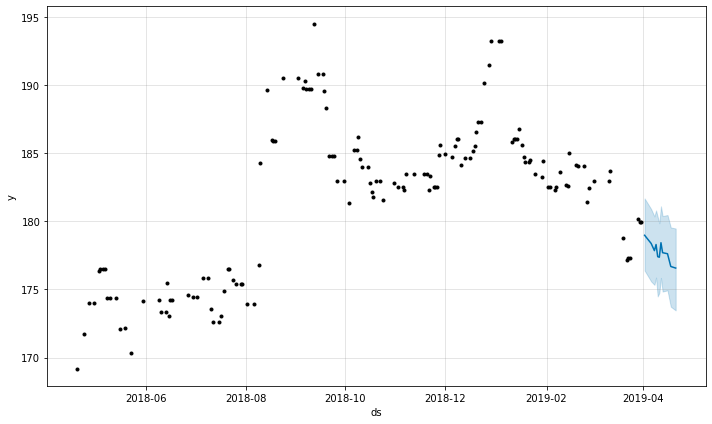

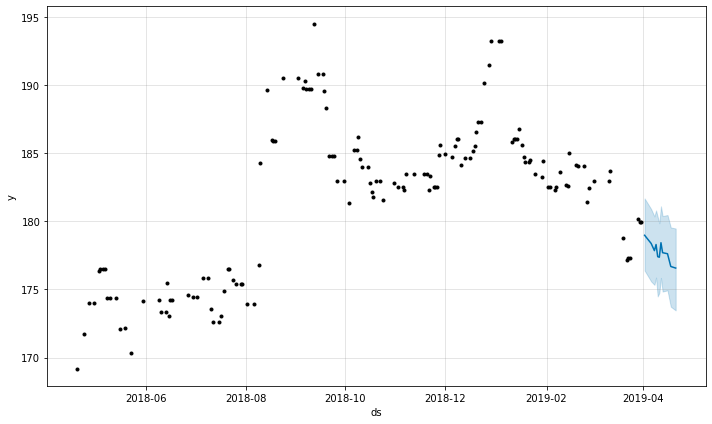

In [40]:
prophet.plot(pred_df)

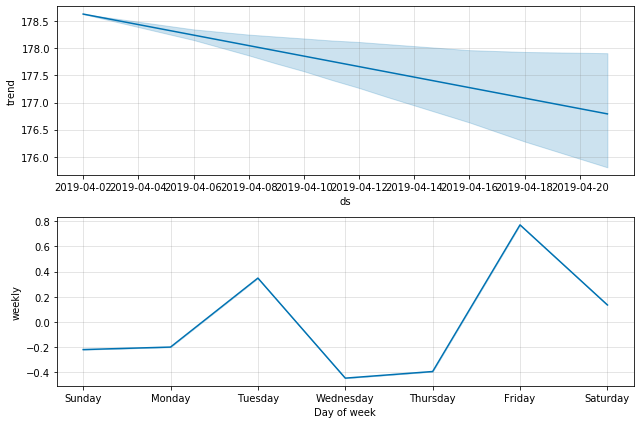

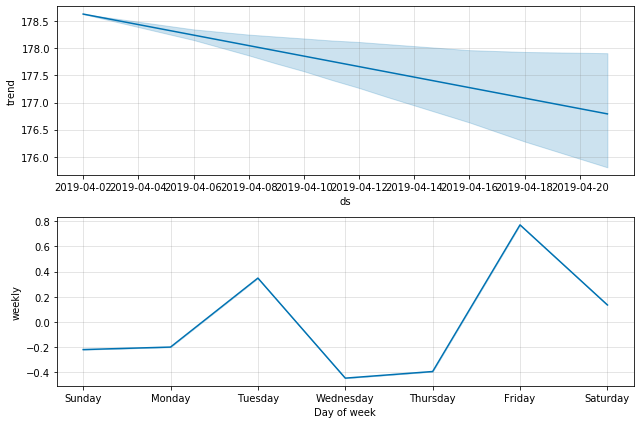

In [41]:
prophet.plot_components(pred_df)

In [42]:
test_df['prophet_model_prediction'] = pred_df['yhat'].values

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


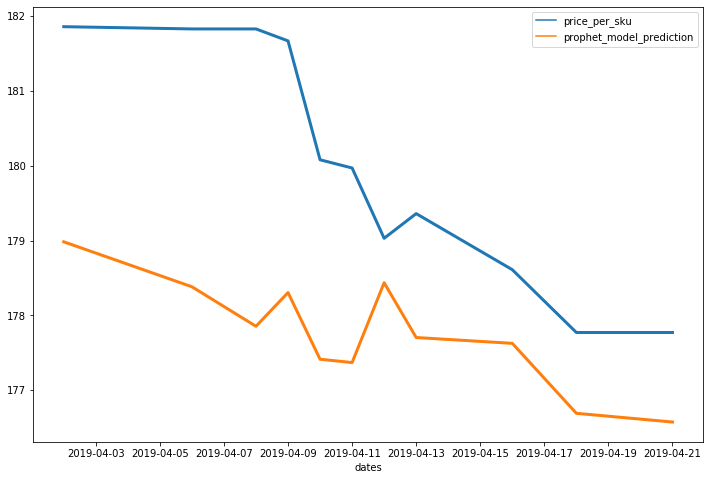

In [43]:
plt.figure(figsize=(12,8))
sns.lineplot(data=test_df[['dates', 'price_per_sku', 'prophet_model_prediction']].set_index('dates'), 
             dashes=False, linewidth = 3)

In [44]:
!pip install orbit-ml

     |████████████████████████████████| 124 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 8.5 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 678 kB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 87.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 827 kB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 6.2 MB/s  eta 0:00:01
     |████████████████████████████████| 203 kB 3.7 MB/s eta 0:00:01
ERROR: pyro-ppl 1.7.0 has requirement torch>=1.9.0, but you'll have torch 1.7.1 which is incompatible.
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.11.0
    Uninstalling statsmodel

In [45]:
from orbit.models.dlt import DLTFull

In [48]:
dlt = DLTFull(
    response_col='price_per_sku', date_col='dates',
    seasonality=365,
)

In [49]:
dlt.fit(df=train_df[['dates', 'price_per_sku']])

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b0a449c7523386cce384e92a998e71c8 NOW.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [51]:
pred = dlt.predict(test_df[['dates']])

In [69]:
pred

,dates,prediction_5,prediction,prediction_95
0,2019-04-02,178.062357,179.814416,182.376591
1,2019-04-06,176.713701,179.882977,182.881056
2,2019-04-08,176.332008,180.039643,183.247207
3,2019-04-09,175.553045,180.068955,183.518188
4,2019-04-10,175.010188,180.626228,184.304824
5,2019-04-11,174.583822,180.303697,186.334732
6,2019-04-12,173.638182,180.404659,186.618501
7,2019-04-13,172.691497,180.049319,187.154918
8,2019-04-16,173.710262,179.725794,188.441344
9,2019-04-18,173.024885,180.022632,187.682376


In [58]:
pred.columns

Index(['dates', 'prediction_5', 'prediction', 'prediction_95'], dtype='object')

In [54]:
from orbit.diagnostics.plot import plot_predicted_data

TypeError: color_palette() got an unexpected keyword argument 'as_cmap'

In [62]:
test_df[['Orbit_lower_bound', 'Orbit_pred', 'Orbit_upper_bound']] = \
pred[['prediction_5', 'prediction', 'prediction_95']].values

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


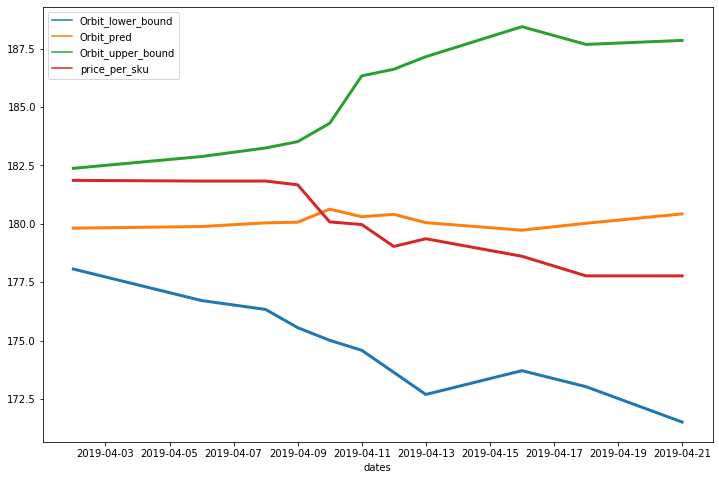

In [70]:
col_list = ['dates', 'Orbit_lower_bound', 'Orbit_pred', 'Orbit_upper_bound', 'price_per_sku']
plt.figure(figsize=(12,8))
sns.lineplot(data=test_df[col_list].set_index('dates'), dashes=False,linewidth = 3)

In [63]:
test_df

,dates,SKU,price_per_sku,num_purchases,ARIMA_low_boundary,ARIMA_high_boundary,ARIMA_model_prediction,prophet_model_prediction,Orbit_lower_bound,Orbit_pred,Orbit_upper_bound
192,2019-04-02,59567,181.86,2,178.068292,183.600099,180.834195,178.982703,178.062357,179.814416,182.376591
194,2019-04-06,59567,181.83,2,176.308268,184.652373,180.480320,178.381623,176.713701,179.882977,182.881056
195,2019-04-08,59567,181.83,1,175.099752,185.532364,180.316058,177.853028,176.332008,180.039643,183.247207
196,2019-04-09,59567,181.67,1,175.312940,186.910904,181.111922,178.303904,175.553045,180.068955,183.518188
197,2019-04-10,59567,180.08,2,172.320169,185.074838,178.697504,177.412344,175.010188,180.626228,184.304824
198,2019-04-11,59567,179.97,2,172.215493,186.064344,179.139919,177.367981,174.583822,180.303697,186.334732
199,2019-04-12,59567,179.03,1,170.324401,185.180201,177.752301,178.435632,173.638182,180.404659,186.618501
200,2019-04-13,59567,179.36,1,169.880705,185.672820,177.776762,177.702824,172.691497,180.049319,187.154918
202,2019-04-16,59567,178.61,2,171.569584,188.328002,179.948793,177.625104,173.710262,179.725794,188.441344
203,2019-04-18,59567,177.77,1,170.106803,187.828211,178.967507,176.689182,173.024885,180.022632,187.682376


In [65]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()

In [64]:
import lightgbm

In [65]:
from xgboost.sklearn import XGBRegressor
from functools import partial

Quantile:
$$C(x) = \left\{\begin{array}{cc}(\alpha-1)|x-q| & \mbox{if }x<q \\ \alpha|x-q| & \mbox{if }x\geq q \end{array}\right. $$

Split condition:

$$\mathcal{L}_{\mbox{ split}} = \frac{\left(\sum\limits_{i \in I_L}g_j \right)^2}{\sum\limits_{i \in I_L}h_j+\lambda}+\frac{\left(\sum\limits_{i \in I_R}g_j\right)^2}{\sum\limits_{i \in I_R}h_j+\lambda}-\frac{\left(\sum\limits_{i \in I}g_j\right)^2}{\sum\limits_{i \in I}h_j+\lambda}~~~~\mbox{for } I_{L} \cup I_{R} = I $$

In [45]:
#@title XGBQuantile Class
class XGBQuantile(XGBRegressor):
    def __init__(self,quant_alpha=0.95,quant_delta = 1.0,quant_thres=1.0,quant_var =1.0,base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='reg:linear', random_state=0,reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,silent=True, subsample=1):
        self.quant_alpha = quant_alpha
        self.quant_delta = quant_delta
        self.quant_thres = quant_thres
        self.quant_var = quant_var
    
        super().__init__(base_score=base_score, booster=booster, colsample_bylevel=colsample_bylevel,
           colsample_bytree=colsample_bytree, gamma=gamma, learning_rate=learning_rate, max_delta_step=max_delta_step,
           max_depth=max_depth, min_child_weight=min_child_weight, missing=missing, n_estimators=n_estimators,
           n_jobs= n_jobs, nthread=nthread, objective=objective, random_state=random_state,
           reg_alpha=reg_alpha, reg_lambda=reg_lambda, scale_pos_weight=scale_pos_weight, seed=seed,
           silent=silent, subsample=subsample)

        self.test = None
  
    def fit(self, X, y):
        super().set_params(objective=partial(XGBQuantile.quantile_loss,alpha = self.quant_alpha,delta = self.quant_delta,threshold = self.quant_thres,var = self.quant_var) )
        super().fit(X,y)
        return self
  
    def predict(self,X):
        return super().predict(X)
  
    def score(self, X, y):
        y_pred = super().predict(X)
        score = XGBQuantile.quantile_score(y, y_pred, self.quant_alpha)
        score = 1./score
        return score
      
    @staticmethod
    def quantile_loss(y_true,y_pred,alpha,delta,threshold,var):
        x = y_true - y_pred
        grad = (x<(alpha-1.0)*delta)*(1.0-alpha)-  ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )*x/delta-alpha*(x>alpha*delta)
        hess = ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )/delta 

        grad = (np.abs(x)<threshold )*grad - (np.abs(x)>=threshold )*(2*np.random.randint(2, size=len(y_true)) -1.0)*var
        hess = (np.abs(x)<threshold )*hess + (np.abs(x)>=threshold )
        return grad, hess
  
    @staticmethod
    def original_quantile_loss(y_true,y_pred,alpha,delta):
        x = y_true - y_pred
        grad = (x<(alpha-1.0)*delta)*(1.0-alpha)-((x>=(alpha-1.0)*delta)& (x<alpha*delta) )*x/delta-alpha*(x>alpha*delta)
        hess = ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )/delta 
        return grad,hess

  
    @staticmethod
    def quantile_score(y_true, y_pred, alpha):
        score = XGBQuantile.quantile_cost(x=y_true-y_pred,alpha=alpha)
        score = np.sum(score)
        return score
  
    @staticmethod
    def quantile_cost(x, alpha):
        return (alpha-1.0)*x*(x<0)+alpha*x*(x>=0)
  
    @staticmethod
    def get_split_gain(gradient,hessian,l=1):
        split_gain = list()
        for i in range(gradient.shape[0]):
            split_gain.append(np.sum(gradient[:i])**2/(np.sum(hessian[:i])+l)+np.sum(gradient[i:])**2/(np.sum(hessian[i:])+l)-np.sum(gradient)**2/(np.sum(hessian)+l) )
    
        return np.array(split_gain)


## Какую метрику качества можно выбрать 

<img src="RMSLE.png" width="800">

<img src="1.png" width="600">
<img src="2.png" width="600">
<img src="3.png" width="600">
<img src="4.png" width="600">
<img src="5.png" width="600">
<img src="6.png" width="600">